In [1]:
from dotenv import load_dotenv
import os

import pandas as pd
from openai import OpenAI

from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

In [2]:
load_dotenv()

True

In [3]:
test = pd.read_csv('../csv/tweet-sentiment-test.csv')[0:300]
test

,Tweet,Label
0,Üç kaynakta da bu geminin tüm gemilerin en iyi...,Nötr
1,"işlemci olarak snapdragon 615, grafik adreno 4...",Pozitif
2,berbat..iğrenç.yazık... bu tarz 1000 tane fıl...,Negatif
3,Bir süre Selanik’te bulundu .,Nötr
4,Dönem milletvekillerinden biri oldu .,Nötr
...,...,...
295,"Ses cok berbat ve rahat degil, önermem kimseye",Negatif
296,siparişim horoz lojistlik tarafından 2. gün ta...,Pozitif
297,Bu özelliğiyle dünyadaki birçok milliyetçi har...,Nötr
298,babam bu telefonu alalı daha 1 ay olmuyor. sad...,Negatif


In [4]:
client = OpenAI(
    api_key=os.getenv('API_KEY'),
)


def classify_text(dataset):

    i = 0
    predictions = []
    while i < dataset.shape[0]:

        try:

            message = dataset.iloc[i]["Tweet"]
            prompt = f"""Do sentiment analysis of input text and return 3 labels: "Pozitif", "Nötr", "Negatif" Message: '{message}'."""
            chat_completion = client.chat.completions.create(
                messages=[
                    {"role": "user", "content": prompt}
                ],
                model="ft:gpt-3.5-turbo-1106:personal::95gmN9fZ",
            )

            response =  chat_completion.choices[0].message.content
            predictions.append(response)

        except Exception as err:
            print(err)

        
        i = i + 1
        print(f"Total messages processed: {i}")
    return predictions

In [5]:
predictions = classify_text(test)

Total messages processed: 1
Total messages processed: 2
Total messages processed: 3
Total messages processed: 4
Total messages processed: 5
Total messages processed: 6
Total messages processed: 7
Total messages processed: 8
Total messages processed: 9
Total messages processed: 10
Total messages processed: 11
Total messages processed: 12
Total messages processed: 13
Total messages processed: 14
Total messages processed: 15
Total messages processed: 16
Total messages processed: 17
Total messages processed: 18
Total messages processed: 19
Total messages processed: 20
Total messages processed: 21
Total messages processed: 22
Total messages processed: 23
Total messages processed: 24
Total messages processed: 25
Total messages processed: 26
Total messages processed: 27
Total messages processed: 28
Total messages processed: 29
Total messages processed: 30
Total messages processed: 31
Total messages processed: 32
Total messages processed: 33
Total messages processed: 34
Total messages processe

In [6]:
predictions

['Pozitif',
 'Pozitif',
 'Negatif',
 'Nötr',
 'Nötr',
 'Negatif',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Nötr',
 'Negatif',
 'Negatif',
 'Pozitif',
 'Negatif',
 'Negatif',
 'Nötr',
 'Negatif',
 'Negatif',
 'Pozitif',
 'Nötr',
 'Negatif',
 'Pozitif',
 'Pozitif',
 'Pozitif',
 'Negatif',
 'Negatif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Negatif',
 'Negatif',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Negatif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Nötr',
 'Nötr',
 'Nötr',
 'Nötr',
 'Negatif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Pozitif',
 'Negatif',
 'Nötr',
 'Pozitif',
 'Negatif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Nötr',
 'Nötr',
 'Nötr',
 'Nötr',
 'Pozitif',
 'Nötr',
 'Negatif',
 'Pozitif',
 'Pozitif',
 'Negatif',
 'Nötr',
 'Negatif',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Pozitif',
 'Negatif',
 'Nötr',
 'Pozitif',
 'Pozitif',
 'Pozitif',
 'Nötr',
 'Nötr',
 'Pozitif',
 'Pozitif'

In [7]:
pred_df = pd.DataFrame(predictions, columns=['Label'])
pred_df.head(10)

,Label
0,Pozitif
1,Pozitif
2,Negatif
3,Nötr
4,Nötr
5,Negatif
6,Pozitif
7,Pozitif
8,Nötr
9,Pozitif


In [8]:
def change_label(label):
    if 'Pozitif' in label:
        return 2
    elif 'Nötr' in label:
        return 1
    elif 'Negatif' in label:
        return 0

In [9]:
pred_df['Label'] = pred_df['Label'].map(change_label)
pred_df

,Label
0,2
1,2
2,0
3,1
4,1
...,...
295,0
296,2
297,2
298,0


In [10]:
test['Label'] = test['Label'].map({'Negatif': 0, 'Nötr': 1, 'Pozitif': 2})

In [11]:
pred_df[pred_df['Label'].isna()]

,Label


In [12]:
print(classification_report(pred_df['Label'].values, test['Label'].values))
print(accuracy_score(pred_df['Label'].values, test['Label'].values))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        85
           1       0.78      0.96      0.86        83
           2       0.94      0.72      0.82       132

    accuracy                           0.84       300
   macro avg       0.84      0.86      0.84       300
weighted avg       0.86      0.84      0.84       300

0.84


<Axes: >

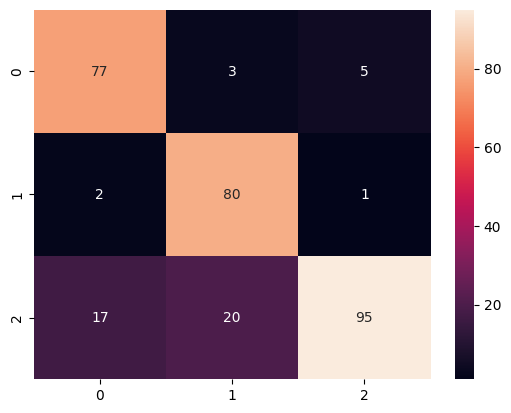

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(pred_df['Label'].values, test['Label'].values),annot = True,fmt='d')